In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## load data and clean up the entries

In [2]:
#load data into the dataframe

df = pd.read_csv("thailand_co2_emission_1987_2022.csv")
df.head()

,year,month,source,fuel_type,emissions_tons
0,1987,1,transport,oil,1588.61
1,1987,2,transport,oil,1428.29
2,1987,3,transport,oil,1581.16
3,1987,4,transport,oil,1557.40
4,1987,5,transport,oil,1513.35


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            2424 non-null   int64  
 1   month           2424 non-null   int64  
 2   source          2424 non-null   object 
 3   fuel_type       2424 non-null   object 
 4   emissions_tons  2424 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 94.8+ KB


In [4]:
df.isna().sum()

year              0
month             0
source            0
fuel_type         0
emissions_tons    0
dtype: int64

In [5]:
df['source'].value_counts()

industry     1296
transport     696
other         432
Name: source, dtype: int64

In [6]:
df['source']=df['source'].astype("category")

In [7]:
df['fuel_type'].value_counts()
df['fuel_type'] = df['fuel_type'].astype("category")

In [8]:
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str), format='%Y-%m')


In [9]:
df.drop(columns=["year","month"],inplace=True)

In [10]:
df['month'] = pd.to_datetime(df['date'],format='%m').dt.strftime('%B')

In [11]:
df['month'].value_counts()

January      202
February     202
March        202
April        202
May          202
June         202
July         202
August       202
September    202
October      202
November     202
December     202
Name: month, dtype: int64

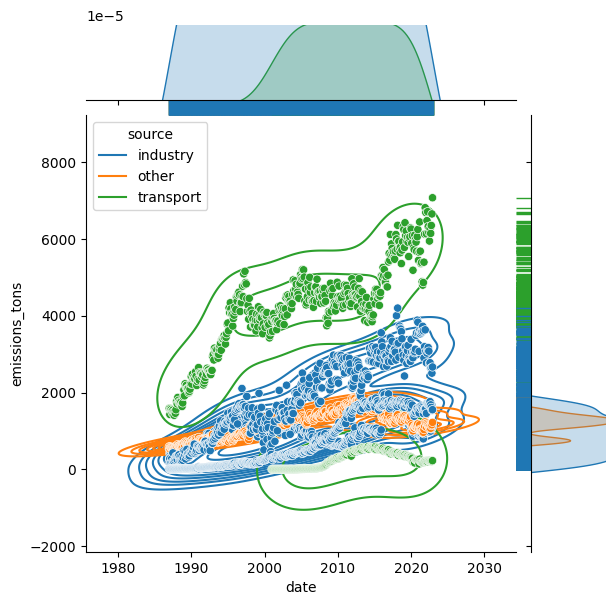

In [12]:
g = sns.jointplot(data=df,x="date",y="emissions_tons",hue="source")
g.plot_joint(sns.kdeplot,color='y',zorder=0)
g.plot_marginals(sns.rugplot,color='r',height=-0.2,clip_on=False)
plt.show()

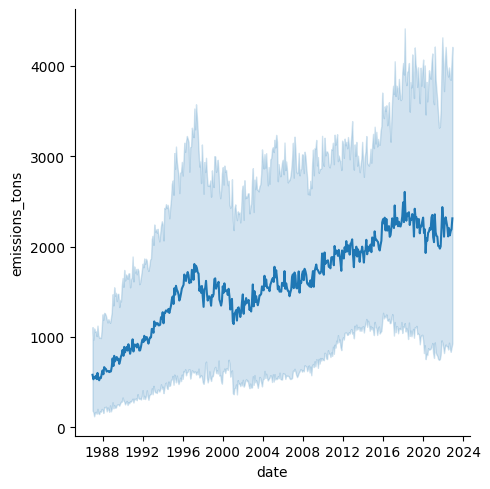

In [13]:
#ploting the emising value over the years

sns.relplot(data =df,x="date",y="emissions_tons",kind="line")
plt.show()

## ploting the emising value over the years based on fuel typ

<Figure size 640x480 with 0 Axes>

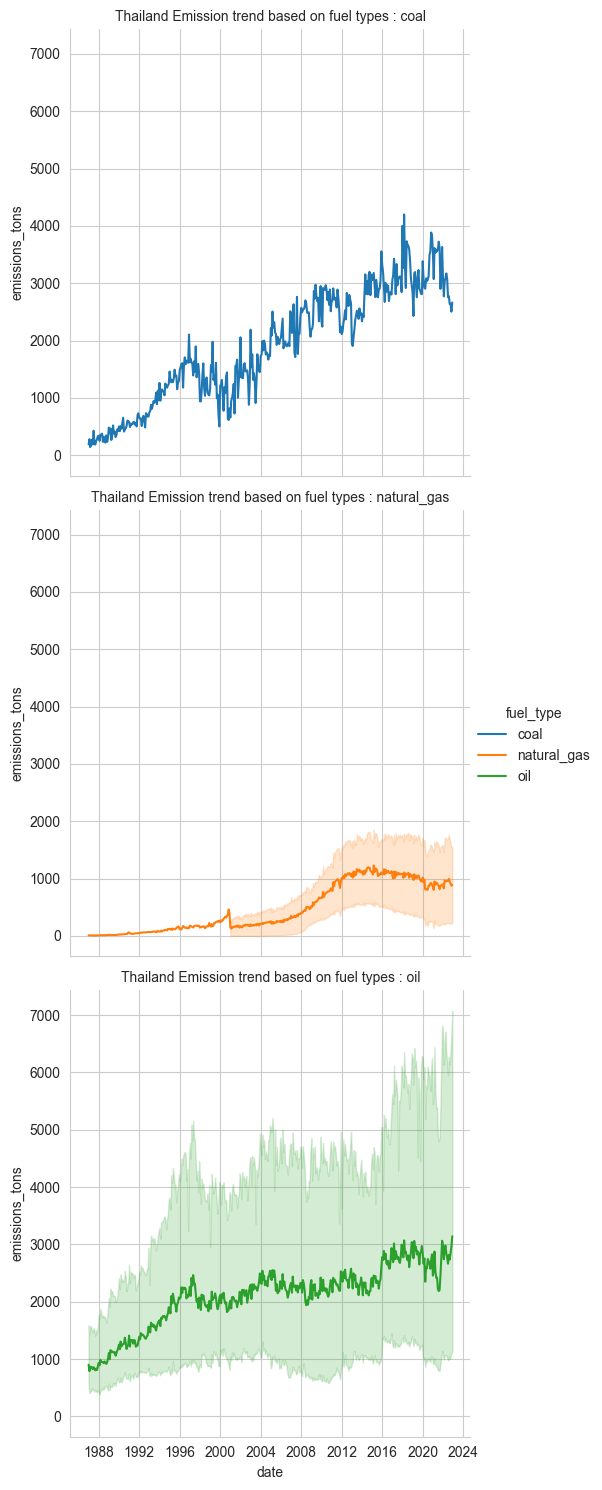

In [14]:
#ploting the emising value over the years based on fuel type
sns.despine()
sns.set_style("whitegrid")
g = sns.relplot(data =df,x="date",y="emissions_tons",kind="line",hue="fuel_type",row="fuel_type")
g.set_titles("Thailand Emission trend based on fuel types : {row_name}")
plt.show()

### Ploting the emising value over the years based on Transport

<Figure size 640x480 with 0 Axes>

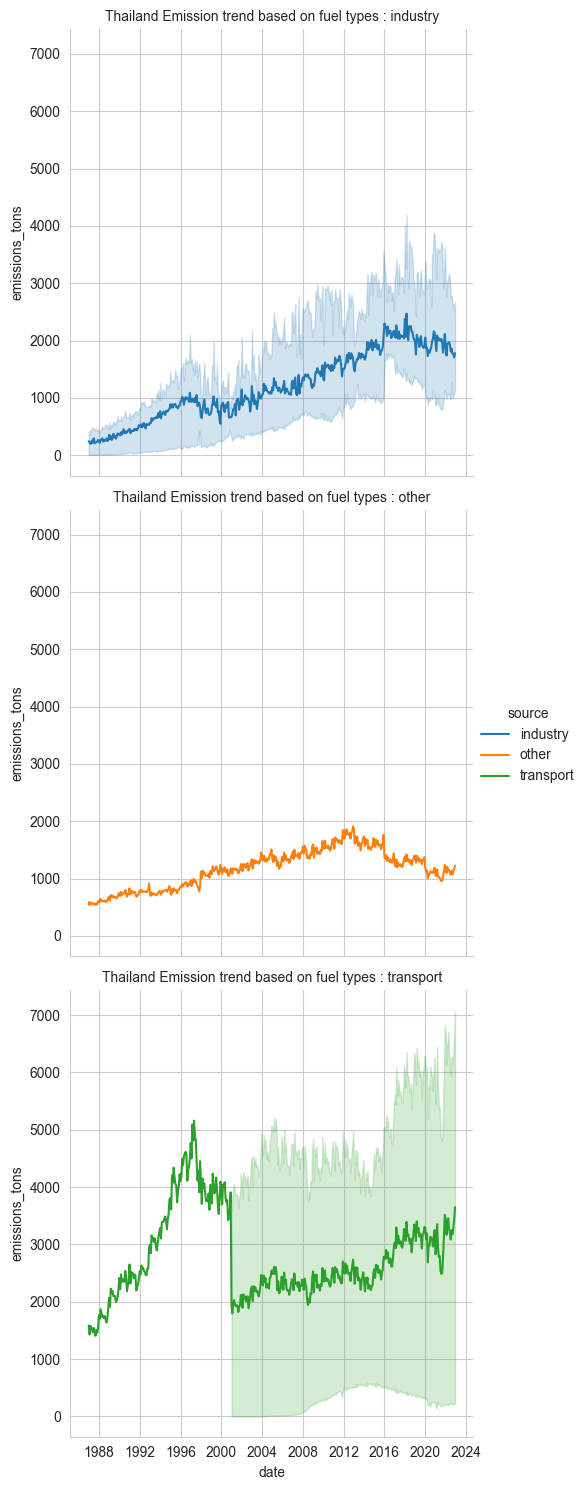

In [15]:
#ploting the emising value over the years based on transport
sns.despine()
sns.set_style("whitegrid")
g = sns.relplot(data =df,x="date",y="emissions_tons",kind="line",hue="source",row="source")
g.set_titles("Thailand Emission trend based on fuel types : {row_name}")
plt.show()

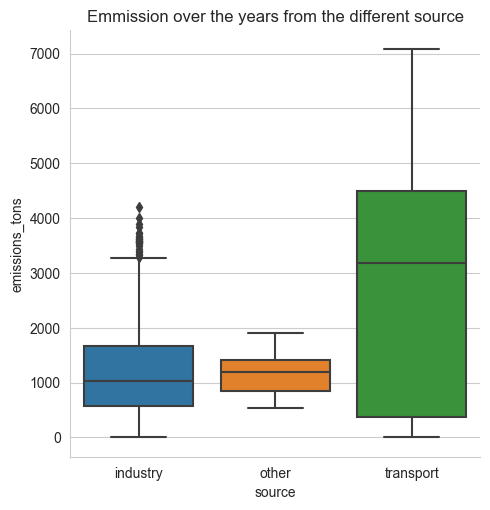

In [16]:
g = sns.catplot(data=df,x="source",y="emissions_tons",kind="box")
plt.title("Emmission over the years from the different source")
plt.show()

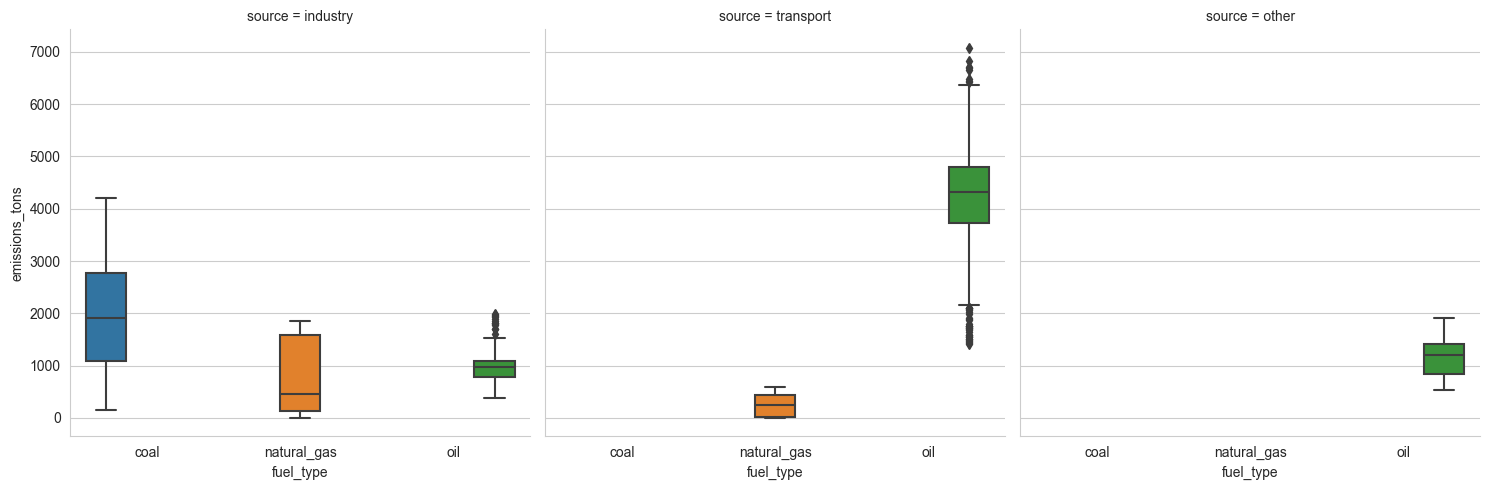

In [17]:
sns.catplot(data=df,x="fuel_type",y="emissions_tons",kind="box",hue="fuel_type",col="source",col_order=["industry","transport","other"])
plt.show()

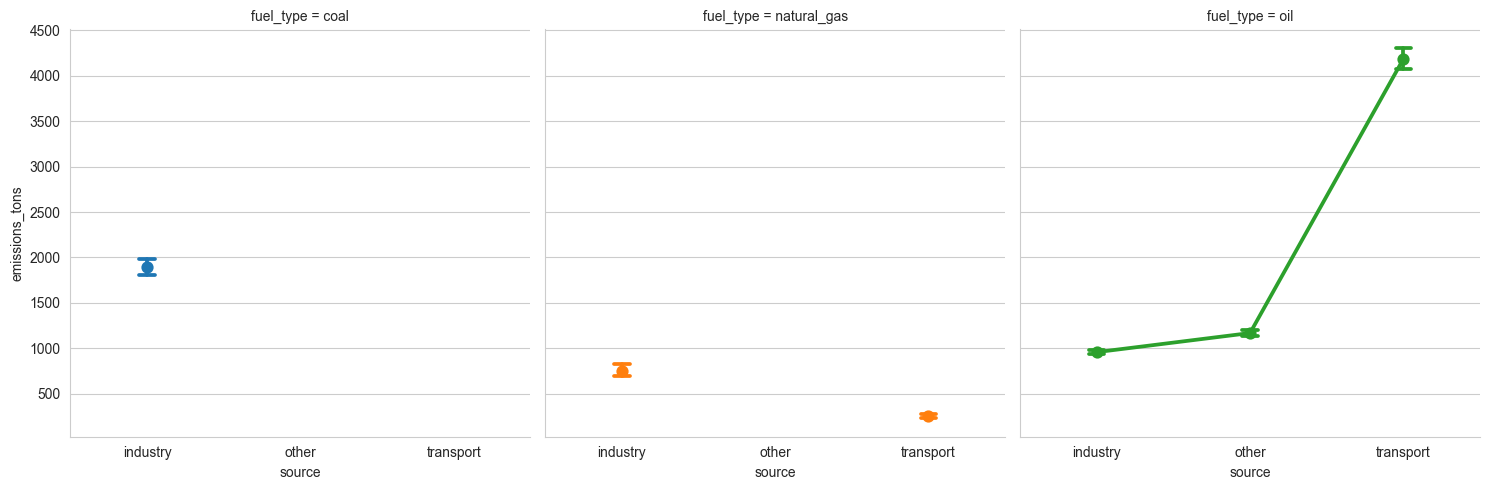

In [18]:
sns.catplot(data=df,x="source",y="emissions_tons",kind="point",hue="fuel_type",col="fuel_type",capsize=0.1)
plt.show()

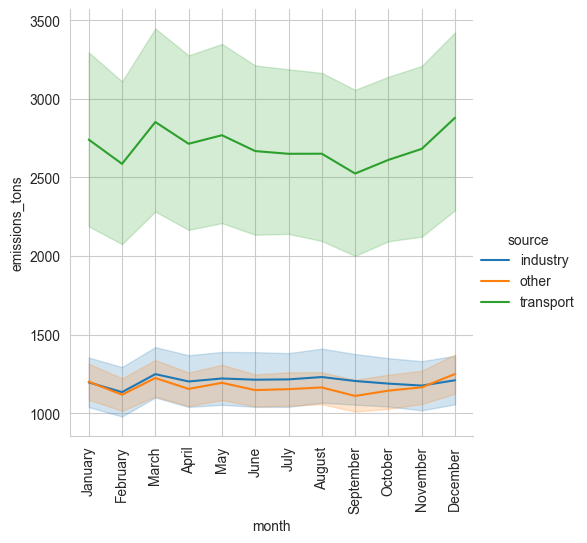

In [19]:

sns.relplot(data=df,x="month",y="emissions_tons",hue="source",kind="line")
plt.xticks(rotation =90)
plt.show()

In [20]:
df.head()

,source,fuel_type,emissions_tons,date,month
0,transport,oil,1588.61,1987-01-01,January
1,transport,oil,1428.29,1987-02-01,February
2,transport,oil,1581.16,1987-03-01,March
3,transport,oil,1557.40,1987-04-01,April
4,transport,oil,1513.35,1987-05-01,May


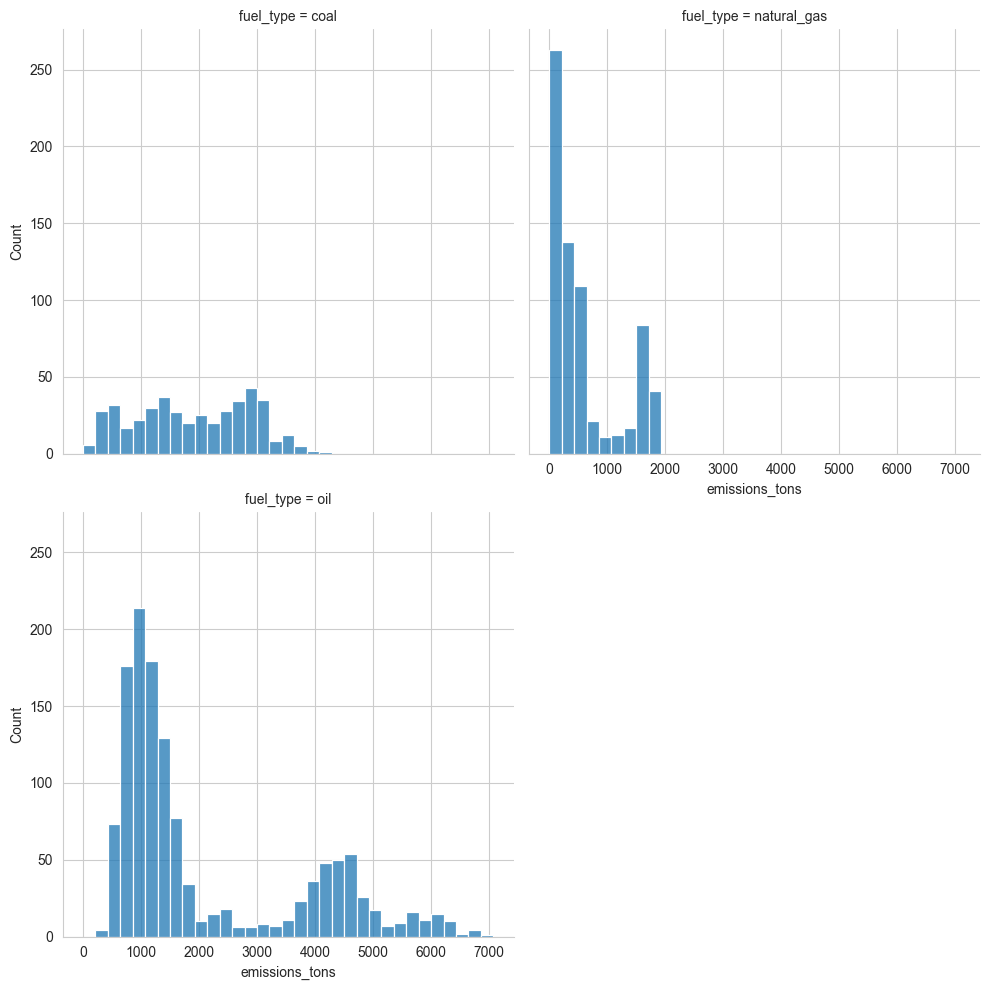

In [28]:
#ML for categorical data 

sns.displot(data=df,x="emissions_tons",col="fuel_type",col_wrap=2)
plt.show()

In [30]:
summary_stats = df.groupby("fuel_type")['emissions_tons'].mean()
summary_stats

fuel_type
coal           1895.101551
natural_gas     566.647385
oil            2103.447824
Name: emissions_tons, dtype: float64

In [35]:
from statsmodels.formula.api import ols


mdl_fuel_vs_emission = ols("emissions_tons ~ fuel_type + 0",data=df).fit()

In [36]:
mdl_fuel_vs_emission.params

fuel_type[coal]           1895.101551
fuel_type[natural_gas]     566.647385
fuel_type[oil]            2103.447824
dtype: float64